# 1. Library python yang akan digunakan


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Import file dari Drive local**  (Ini Ada beberapa cara ) 

1) From Github (Files < 25MB)
url = 'copied_raw_GH_link'
df1 = pd.read_csv(url)

Dataset is now stored in a Pandas Dataframe

2) From Local Drive 
from google.colab import files
uploaded = files.upload()

3) From Google Drive via PyDrive

Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Kita Import dari Drive local


In [2]:
from google.colab import files
uploaded = files.upload()

Saving datalab.csv to datalab.csv


# 3. Memuat dataset yang akan digunakan menggunakan library pandas dengan function **read_csv** (karena file kita extensionnya csv).

In [3]:
# Nama dataframe kita adalah datalab yang berisi data dari datalab.csv
# Hanya menggunakan kolom YearsExperience dan Salary
datalab = pd.read_csv('datalab.csv', usecols=['YearsExperience', 'Salary'])

# Melihat 5 Baris teratas dari dataset
datalab.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# 4. Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan

In [4]:
datalab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  20 non-null     float64
 1   Salary           20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


# 5. Melihat isi kolom Salary di datalab beserta keterangan type data 

In [5]:
print(datalab ['Salary'] )

0     39343
1     46205
2     37731
3     43525
4     39891
5     56642
6     60150
7     54445
8     64445
9     57189
10    63218
11    55794
12    56957
13    57081
14    61111
15    67938
16    66029
17    83088
18    81363
19    93940
Name: Salary, dtype: int64


# 6. Melihat statistical description dari data mulai dari mean, kuartil, standard deviation

In [6]:
datalab.describe()

,YearsExperience,Salary
count,20.000000,20.000000
mean,3.590000,59304.250000
std,1.468942,14755.254379
min,1.100000,37731.000000
25%,2.725000,52385.000000
50%,3.800000,57135.000000
75%,4.600000,64841.000000
max,6.000000,93940.000000


# 7. Mencari dan menangani missing values. Ternyata data kita tidak ada missing values.

In [7]:
datalab.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# MEMBUAT PERHITUNGAN LINEAR REGRESSION 

## 1. Buat variabel (x) dan (y)

In [8]:
#Pertama, buat variabel x dan y.
x = datalab['YearsExperience'].values.reshape(-1,1)
y = datalab['Salary'].values.reshape(-1,1)

## 2. Kita split data kita menjadi training and testing dengan porsi 80:20.


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size=0.2, random_state=42)

## 3. Kita bikin object linear regresi.

In [10]:
lin_reg = LinearRegression()

## 4. Training the model menggunakan training data yang sudah displit sebelumnya.

In [11]:
lin_reg.fit(x_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[9789.25970874]]
[23124.17657767]


### Maka berdasarkan code di atas kita memiliki persamaan Linear Regression 
### Y = mx+c 
### Y = 9789 x + 23124


##5. Akurasi model Linear Regression 


In [12]:
lin_reg.score(x_test, y_test)

0.8246705538087977

#Visualisasi Regression Line menggunakan data testing

Text(0.5, 1.0, 'Plot')

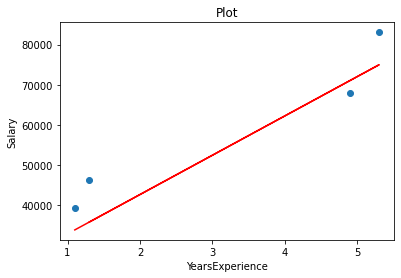

In [13]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Plot')

# 6. Predict Gaji (Salary) dengan Pengalaman Kerja (YearsExperience) 12 years

In [14]:
lin_reg.predict([[12]])

array([[140595.29308252]])

# Dibaca : Gaji yang akan diterima oleh orang yang memiliki pengalaman 12 tahun adalah $ 140.595

# Tugas Kelompok ( 2 orang) 
# Buatlah Analysis Regresi Linear dengan cara yang sama 
# Gunakan data yang sudah ditentukan untuk kelompok masing masing 